In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
# Decision Trees can be built with discrete features...
from IPython.display import Image
Image(url="https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg")

In [3]:
# ... and continuous features too!
Image(url="https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png")

## Obtaining Data

In [4]:
# Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

df = pd.read_csv('./breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Information about the dataframe: column names, data types, null value counts, etc

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Scrubbing Data

In [6]:
# 'id' column won't help us predict our diagnosis, so we'll drop that.

df.drop('id', axis=1, inplace=True)

In [7]:
# Let's replace 'B' and 'M' with 0 and 1

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

There aren't any NaN values and all columns conveniently hold numerical values, so we wont't need any encoding.

## Exploring Data

diagnosis
0    357
1    212
Name: count, dtype: int64


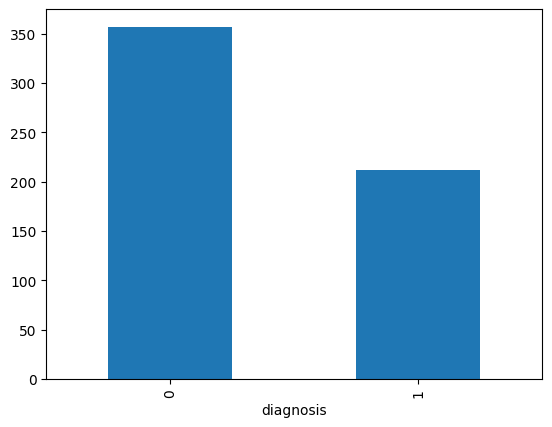

In [8]:
# Checking label/class distribution

print(df['diagnosis'].value_counts())
p = df['diagnosis'].value_counts().plot(kind="bar")

Remember, 0 is "Benign" and 1 is "Malignant"

Most instances of the dataset are of Benign cancer.

In this dataset, "Benign" outnumber "Maglignant" at a rate of approximately 1,68 : 1

In [9]:
# Basic statistical analysis

# count ---> number of NoN-empty rows in a feature.
# mean ---> mean value of that feature.
# std ---> Standard Deviation Value of that feature.
# min ---> minimum value of that feature.
# 25%, 50%, and 75% ---> percentile/quartile of each features. This quartile information helps us detect Outliers.
# max ---> maximum value of that feature.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


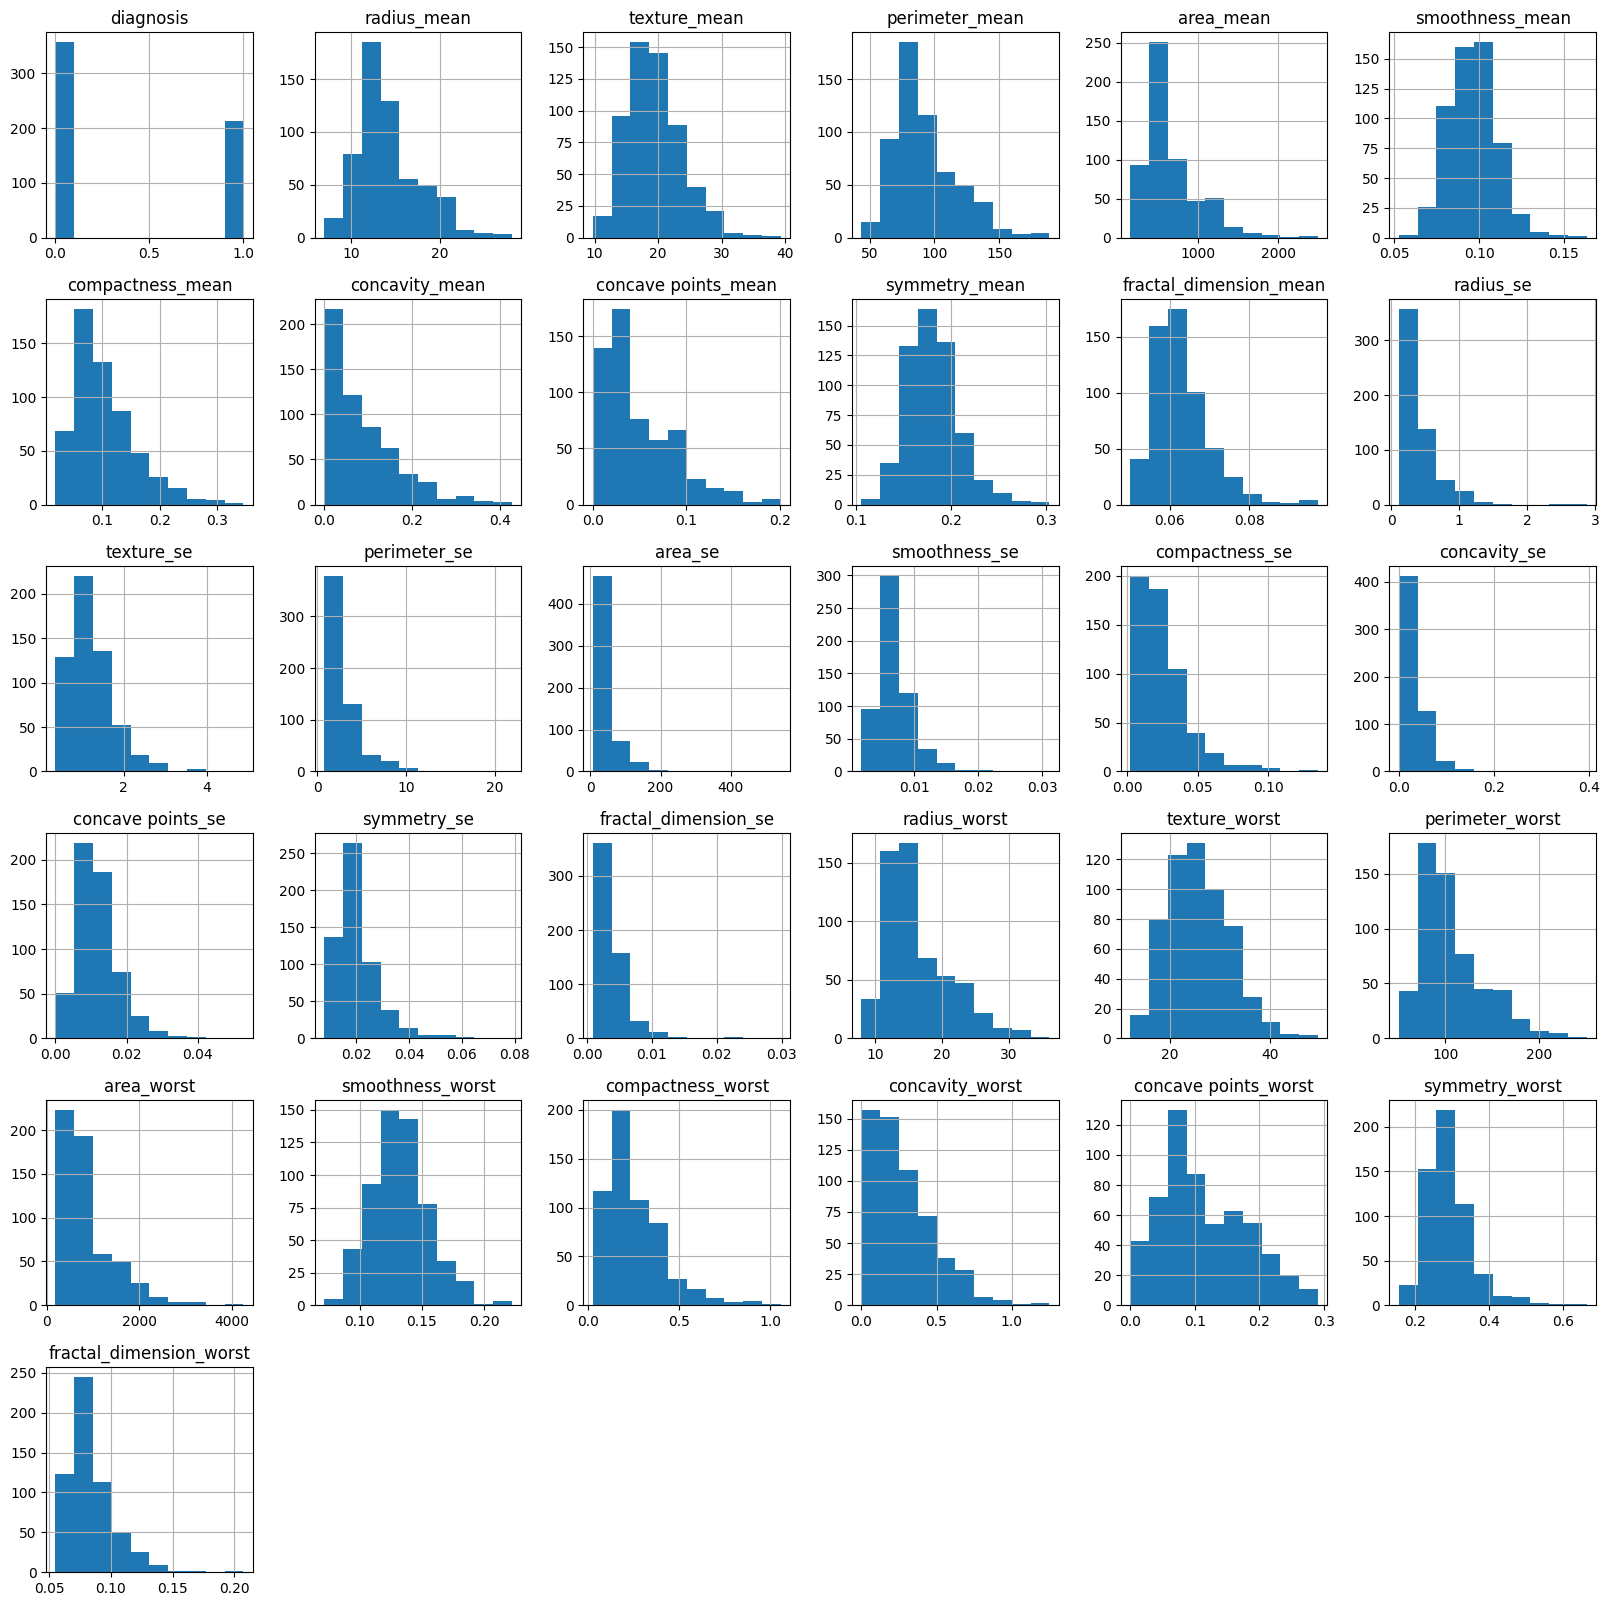

In [10]:
# Histogram for each feature

p = df.hist(figsize = (20,20))

Sometimes, when analysing a feature, the "0" value shouldn't be possible, and instead indicates the value in that instance is missing. Some datasets make this design choice, instead of inputing a "null" value. So we have to keep an eye on that when the minimum value of a column is "0".

In this case, a cell's "concavity" and "concave points" are characteristics that can present the value 0 in the problem domain. So it's not an issue for this dataset.

### Is Feature Selection important in a Decision Tree classifier?

One curious thing about Decision Trees is that they can either be used as a classification model (and as a regression model as well) or as a feature selection method! Summarizing a lot, that's because the algorithm implicitly goes through all our features and in its own way, already computes each one's importance, or "information gain". Because of this, if our predictive model itself is a Decision Tree algorithm, then selecting features before training is redundant, unless we have an enormous amount of features, such that a significant enough technical debt is perceived.

A Decision Tree can perform splits based on different criterion, the most popular ones being "Information Gain" and "Gini Index". Information Gain is measured using Shannon Entropy, which in summary basically tells us "how much this feature separates our target variables", the more it separates, the most useful that feature is as the next split factor.

We can preview our features with higher "Information Gain" using sklearn.feature_selection.mutual_info_regression, which captures even non-linear relations between each feature and the target variable using the concept of "entropy".

In [11]:
# Separating the dataframe feature columns (X) and target column (y)
feature_columns = df.columns.tolist()
feature_columns.remove('diagnosis')

X = df[feature_columns]
y = df['diagnosis']

In [12]:
from sklearn.feature_selection import mutual_info_regression

# Calculating information gain
ig = mutual_info_regression(X, y)

# Creating and sorting a dataframe by information gain (importance) value
feature_importance = pd.DataFrame({'feature': feature_columns, 'importance': ig})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Printing
print(feature_importance)

                    feature  importance
22          perimeter_worst    0.475295
23               area_worst    0.463288
20             radius_worst    0.456132
7       concave points_mean    0.444614
27     concave points_worst    0.434296
2            perimeter_mean    0.401216
6            concavity_mean    0.370850
0               radius_mean    0.366920
3                 area_mean    0.359684
13                  area_se    0.336368
26          concavity_worst    0.312866
12             perimeter_se    0.272102
10                radius_se    0.244752
25        compactness_worst    0.226346
5          compactness_mean    0.214015
17        concave points_se    0.122633
21            texture_worst    0.122146
16             concavity_se    0.110509
24         smoothness_worst    0.103452
28           symmetry_worst    0.093358
1              texture_mean    0.093248
4           smoothness_mean    0.083723
8             symmetry_mean    0.074386
15           compactness_se    0.074133


## Modeling

### Train-test split

There are certain problems to be aware of before splitting our data into train and test sets.

We want to make sure neither the train or test set gets an unrepresentative amount of the labels. For example, it can lead our model to "learn too little" about one class in the training set, and then getting tested with many more cases in the test set. So, to guarantee our split will be representative of the label distribution, we use the parameter 'stratify=y' in the method train_test_split().

Also, to ensure our results will be reproductible, we set random_state=1, which gives us a determined train-test split.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/100, random_state=1, stratify=y)

In [14]:
X_train.shape

(398, 30)

In [15]:
X_test.shape

(171, 30)

### Is normalizing data important in a Decision Tree classifier?

Contrary to kNN, the Decision Tree algorithm doesn't use distance in the vector space to classify new data. Instead, our tree will be using Shannon Entropy, which isn't affected by distance or data scale. Therefore normalizing data isn't a crucial step in this algorithm.

### Training and Evaluating

For didatic and intuition purposes, we will be instancing and training trees with increasingly more depth, even though the accuracy of the first ones evidently won't be high as we'd like.

For evaluating, we'll use F1-score. Why? The F1-score metric penalises your model more for wrong predictions of classes that are in the minority within the dataset. In datasets where class distribution is very uneven, F1-score highlights your model inaccuracy better than the Jaccard Score.

Think about it this way, if a certain dataset has 2 classes 'A' and 'B' where for each 'A' we have 9 'B's, if we have a model that simply classifies every instance as 'B', Jaccard Score would give this model a 90% accuracy rate. However, if you think about it conceptually, in a dataset where the 'B'/'A' rate is 9:1, predicting an 'A' right is much more important than predicting a 'B', a class so abundant that can almost be taken as a "default value".

In this dataset, the label distribution isn't so uneven actually. The rate of "Benign" to "Malignant" cancer instances is approximately 1,68:1. Still, a minimal effect in the score still happens, and when thinking about it conceptually, letting a Malignant tumor (the class in the minority here) pass as Benign is a far more serious mistake than the other way around. For this reason, our evaluation metric will be F1-score.

### 1-depth tree

In [16]:
# Training
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=1).fit(X_train,y_train)

# Predicting
yhat = tree.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

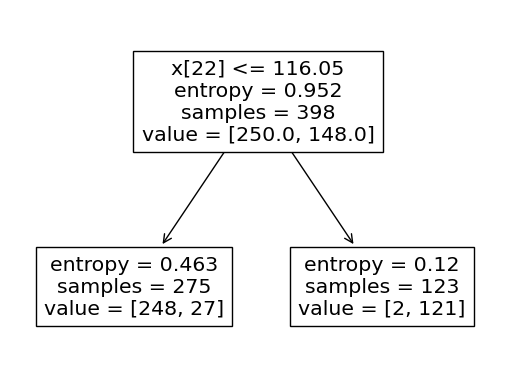

Training set Accuracy (F1-Score):  0.8929889298892989
Test set Accuracy (F1-Score):  0.8288288288288288
The chosen feature for the split was X[22]: "perimeter_worst"


In [17]:
from sklearn.tree import plot_tree
plot_tree(tree)
plt.show()

from sklearn.metrics import f1_score
print("Training set Accuracy (F1-Score): ", f1_score(tree.predict(X_train), y_train))
print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

feature_index = tree.tree_.feature[0]
print(f"The chosen feature for the split was X[{feature_index}]: \"{feature_columns[feature_index]}\"")

We can see that, even though we just used one feature for the split, our tree classifier already reaches >0.8 accuracy. This shows us that feature "perimeter_worst" is very discriminative with our labels, as we foresaw with sklearn.feature_selection.mutual_info_regression a couple cells above.

This doesn't necessarily mean that, after increasing the tree's depth, the feature to pivot the next split will be the feature with second highest Information Gain in general (area_worst). Since some of this information may already have been captured by "perimeter_worst". So, as we increase depth, the next feature will be the one with highest Information Gain **inside the split already performed by "perimeter_worst"**. So hipotetically, if "area_worst" distributes our instances into labels in a very similar distribution to what "perimeter_worst" did, it won't be the best feature to pivot our next split.

### 2-depth tree

In [18]:
# Training
tree = DecisionTreeClassifier(criterion="entropy",max_depth=2).fit(X_train,y_train)

# Predicting
yhat = tree.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

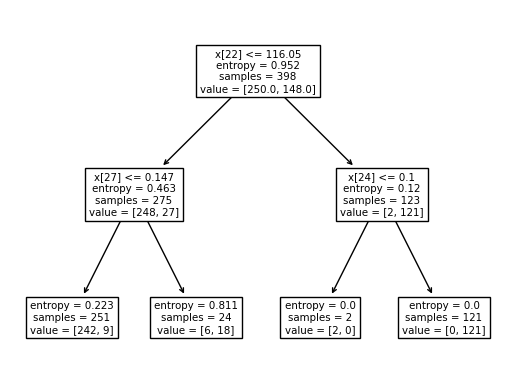

Training set Accuracy (F1-Score):  0.9488054607508533
Test set Accuracy (F1-Score):  0.8833333333333333
The chosen features, in split order, are:
"perimeter_worst"
"concave points_worst"
"smoothness_worst"


In [19]:
plot_tree(tree)
plt.show()

print("Training set Accuracy (F1-Score): ", f1_score(tree.predict(X_train), y_train))
print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

# In a max_depth=2 tree, our 2nd and 3rd split features are located on indexes [1] and [4], as you can check by running "tree.tree_.feature"
feature_index1 = tree.tree_.feature[0]
feature_index2 = tree.tree_.feature[1]
feature_index3 = tree.tree_.feature[4]

print(f"The chosen features, in split order, are:")
print(f"\"{feature_columns[feature_index1]}\"")
print(f"\"{feature_columns[feature_index2]}\"")
print(f"\"{feature_columns[feature_index3]}\"")

In [20]:
tree.tree_.feature

array([22, 27, -2, -2, 24, -2, -2], dtype=int64)

At this point, you may notice that some leaf nodes have already fully discriminated the training samples between Malignant and Benign with just 2 feature splits. Therefore, increasing max_depth won't add any child nodes to these nodes.

### 3-depth tree

In [21]:
# Training
tree = DecisionTreeClassifier(criterion="entropy",max_depth=3).fit(X_train,y_train)

# Predicting
yhat = tree.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

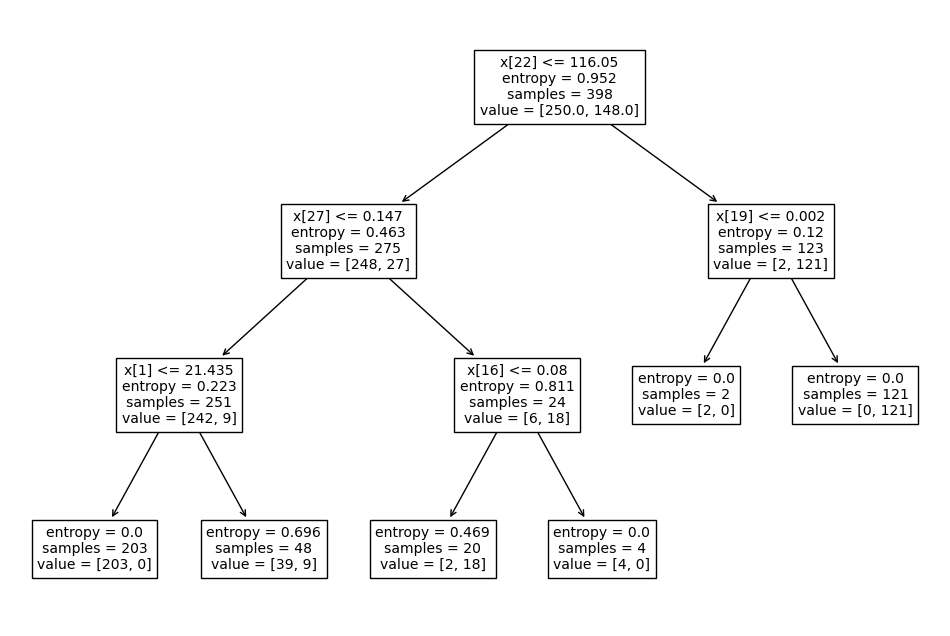

Training set Accuracy (F1-Score):  0.9619377162629758
Test set Accuracy (F1-Score):  0.8739495798319328


In [22]:
plt.figure(figsize=(12, 8))
plot_tree(tree)
plt.show()

print("Training set Accuracy (F1-Score): ", f1_score(tree.predict(X_train), y_train))
print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

### 4-depth tree

In [23]:
# Training
tree = DecisionTreeClassifier(criterion="entropy",max_depth=4).fit(X_train,y_train)

# Predicting
yhat = tree.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

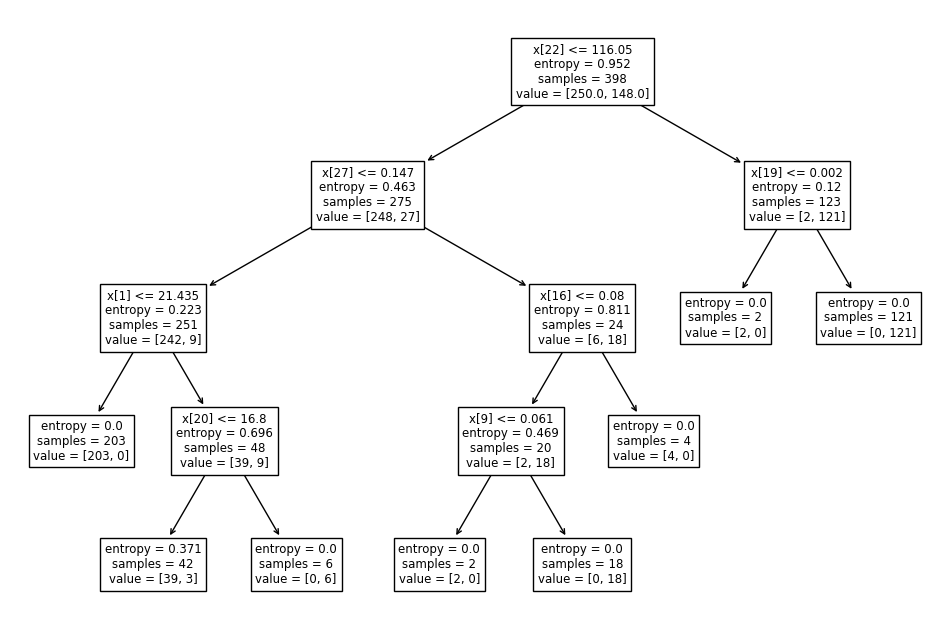

Training set Accuracy (F1-Score):  0.9897610921501706
Test set Accuracy (F1-Score):  0.8739495798319328


In [24]:
plt.figure(figsize=(12, 8))
plot_tree(tree)
plt.show()

print("Training set Accuracy (F1-Score): ", f1_score(tree.predict(X_train), y_train))
print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

At max_depth=4, almost all our leaf nodes are fully discriminated. If at k-depth they all are fully discriminated, that means our model with these "k" features is able to correctly tell apart any sample in the training set, which would give us 100% accuracy on it. As you may know by looking at training and test accuracy, that's a sign of overfitting: training accuracy is approaching a perfect score, but test accuracy isn't getting higher.

### 5-depth tree

In [25]:
# Training
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5).fit(X_train,y_train)

# Predicting
yhat = tree.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

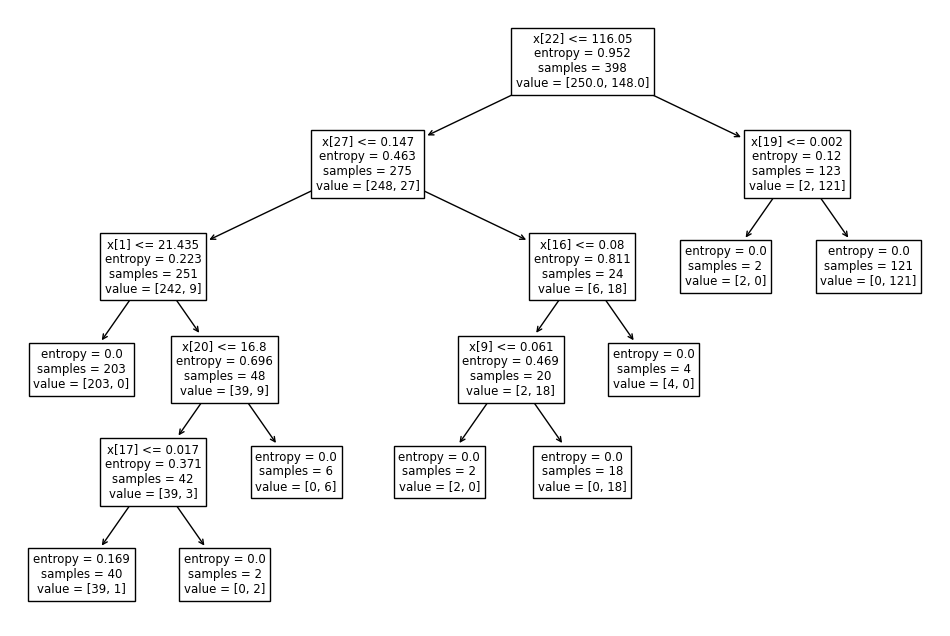

Training set Accuracy (F1-Score):  0.9966101694915255
Test set Accuracy (F1-Score):  0.8666666666666667


In [26]:
plt.figure(figsize=(12, 8))
plot_tree(tree)
plt.show()

print("Training set Accuracy (F1-Score): ", f1_score(tree.predict(X_train), y_train))
print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

This is our tree and its train/test performance at max_depth=5. It's been clear now that further increasing max_depth won't help our model predict unseen values, which is the ultimate goal of any classifier.

### Validating

In [27]:
# Representation of k-fold Cross Validation:
Image(url="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png")

We should know that not all training sets have the same 'suitability' for training our model.

Different training sets in the same dataset can present larger data diversity than others, or have less data noise than others. Thus, a good practice is to test our model against different train/test splits, and evaluating how it fares in all of them in average. That should give us a more solid idea of how accurate the model is against new real-world unseen data.

This technique is known as k-fold Cross Validation.

Also, keep in mind we still want to stratify the data (maintain the proportion of labels seen in the whole dataset) every time we split it into new train and test sets. That's why we'll be using sklearn's StratifiedKFold class.

We will also be performing Cross Validation for different values of max_depth up to 8. Why 8? Because, for comparing, we want our tree to get as big as it can, and after some experiments, 8 is already a guaranteed enough max_depth number for this. Testing higher numbers won't result in our tree getting bigger, instead acting the same as re-running the cross-validation with max_depth=8 multiple times. Yes, they yield different results, but only because of the non-deterministic behaviour of sklearn's algorithm (since we didn't set a random_state for the classifier itself). 

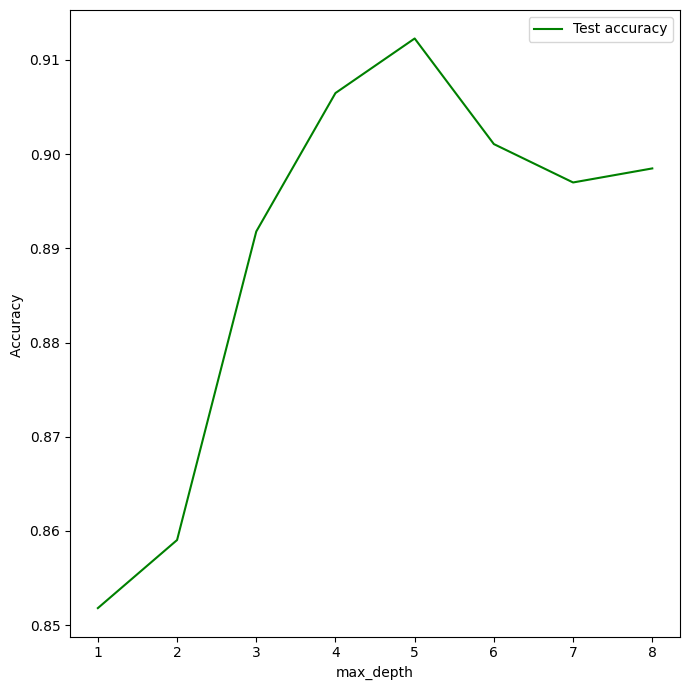

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

mean_acc_test = np.zeros(8)

for k in range(1,9):
    
    tree = DecisionTreeClassifier(criterion="entropy",max_depth=k).fit(X_train,y_train)
    cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(tree, X, y, scoring='f1', cv=cv)

    # Get accuracies
    mean_acc_test[k-1] = np.mean(scores)

# Plotting graph
plt.figure(figsize=(7,7))
plt.plot(range(1,9),mean_acc_test,'g')
plt.legend(['Test accuracy'])
plt.ylabel('Accuracy ')
plt.xlabel('max_depth')
plt.tight_layout()
plt.show()

In [42]:
print(f"Best accuracy after cv was at max_depth {np.argmax(mean_acc_test) + 1} with score {max(mean_acc_test)}")

Best accuracy after cv was at max_depth 5 with score 0.9122731978818394


Some references:

- https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/
- https://www.kaggle.com/code/beyzanks/principal-component-analysis-pca-rf-knn/notebook
- Machine Learning with Python Course (IBM)